In [25]:
from numpy import cos, sin, dot, array, sqrt, linalg, radians, arccos, dot, rad2deg, cross
import numpy as np
import quaternion

## Orientációs feladatok

### 1. feladat: Írjuk fel azt a forgatási mátrixot, amely először az Y tengely körüll forgat 30 fokot, majd az X tengely körül forgat 20 fokot!

In [7]:
## Calculate the rotation matrix
beta = 30
Ry = array([[cos(beta), 0, sin(beta)], [0, 1, 0], [-1*sin(beta), 0, cos(beta)] ])
print(Ry)
alpha = 20
Rx = array([[1, 0, 0], [0, cos(alpha), -1*sin(alpha)], [0, sin(alpha), cos(alpha)]])
print(Rx)
## Calculate the rotation next to the two axis
Ryx = dot(Ry, Rx)
print(Ryx)


[[ 0.15425145  0.         -0.98803162]
 [ 0.          1.          0.        ]
 [ 0.98803162  0.          0.15425145]]
[[ 1.          0.          0.        ]
 [ 0.          0.40808206 -0.91294525]
 [ 0.          0.91294525  0.40808206]]
[[ 0.15425145 -0.90201878 -0.40319798]
 [ 0.          0.40808206 -0.91294525]
 [ 0.98803162  0.14082313  0.06294725]]


### 2.Feladat: 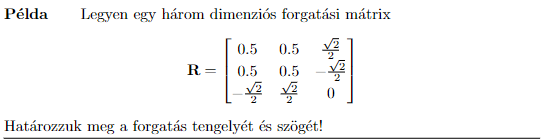

In [ ]:
R_I = array([[-0.5,0.5,(sqrt(2)/2)],[0.5,-0.5,-(sqrt(2)/2)],[-(sqrt(2)/2),(sqrt(2)/2),-1]])
zerovect = array([0,0,0])
v = linalg.solve(R_I,zerovect)
print(v)

### 3. Feladat: Irjuk fel a v = [1, 2, 3] tengely körüli α = 40◦ forgatáshoz tartozó forgatási kvaterniót! Irjuk fel az ugyanekkora szöggel, de az X tengely körüli forgatást jelképező kvaterniót!

In [8]:
theta = 40
# Rotation axis
v = array([1,2,3])
# calculate the unity vector of the rotation
u = v / linalg.norm(v)
# calculate the rotation quaternion
q = np.quaternion(cos(radians(theta/2)), sin(radians(theta/2))*u[0], sin(radians(theta/2))*u[1], sin(radians(theta/2))*u[2])
print(q)
# Rotate arouind the X vect
u = array([1,0,0])
q = np.quaternion(cos(radians(theta/2)), sin(radians(theta/2))*u[0], sin(radians(theta/2))*u[1], sin(radians(theta/2))*u[2])
print(q)


quaternion(0.939692620785908, 0.0914087282642836, 0.182817456528567, 0.274226184792851)
quaternion(0.939692620785908, 0.342020143325669, 0, 0)


### 4. Feladat: Forgassuk el a p = [1, 2, 1] vektort a u = [1, 1, 1] tengely körül 30 fokkal! Oldjuk meg a feladatot kvaterniók segítségével !

In [7]:
# Input data
p = array([1,2,1])
u = array([1,1,1])
u = u / linalg.norm(u)
theta = 30
# calculate the rotation quaternion 
q = np.quaternion(cos(radians(theta/2)), u[0]*sin(radians(theta/2)),u[1]*sin(radians(theta/2)),u[2]*sin(radians(theta/2)))
# claclualted the rotated point q*p*q'
v = np.quaternion(0,p[0],p[1],p[2])
prot = q*v*q.conjugate()
print(prot)

quaternion(2.77555756156289e-17, 0.755983064143708, 1.91068360252296, 1.33333333333333)


### 5. feladat: 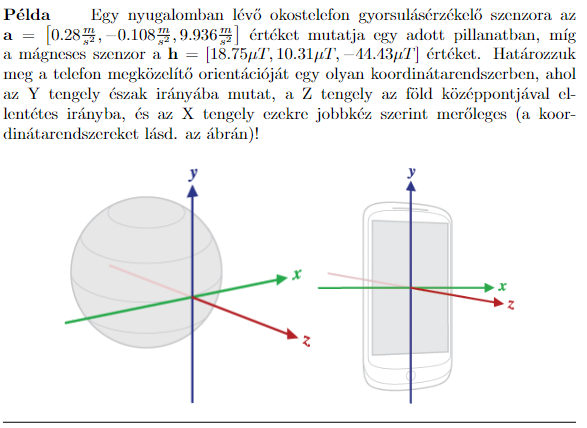

In [37]:
a = array([0.28, -0.108, 9.936])
h = array([18.75,10.31,-44.43])

anorm = linalg.norm(a) # It is equal to the gravitation vector and shows to up a = -g
hnorm = linalg.norm(h)
print("a norm: " + str(anorm))
print("h norm: " + str(hnorm))

#angle calculation between the two vector
h = h/hnorm
a = a/anorm
angle = arccos(radians(dot(a,h)))
print("angle: " + str(rad2deg(angle)))

#vector calculation
z = -1*a
x = cross(z,h)
x= x/linalg.norm(x)
y = cross(x,z)

R = array([x, y, -1*z])
print(R.transpose())


a norm: 9.940531172930347
h norm: 49.31413083488342
[ 0.38021556  0.20906786 -0.9009588 ]
angle: 90.89214588060861
[[ 0.44084949  0.89713897  0.02816751]
 [-0.89730704  0.44127319 -0.01086461]
 [-0.02217663 -0.02048525  0.99954417]]
